#Data Mining

##Data Balance

Before applying data mining techniques, we have to check if our dataset is balanced or not, and if the dataset is unbalanced we have to balance it before constructing any model, to prevent the model from being biased toward the majority class.

###Check if the data is balance

In [ ]:
import pandas as pd
df = pd.read_csv('Dataset/Processed_dataset.csv')

#calculate the frequancy for each type in  the class label
class_frequency = df['CLASS'].value_counts(normalize=True)*100

print("The percentage of each type in the class lable\n" +class_frequency.to_string())

The percentage of each type in the class lable
CLASS
Y    82.485876
N    10.593220
P     6.920904


The percentage of each class reveals that the majority of our dataset belongs to class (Y). This indicates that our dataset is unbalance.

###Balancing data

In [ ]:
# Check initial class distribution
print("Original class distribution:\n", df['CLASS'].value_counts())

# Set desired total sample size and calculate required samples for each class
total_sample_size = 709  # Desired sample size
CLASS_N_sample_size = int(total_sample_size * 0.3)  # 30% for CLASS = N
CLASS_P_sample_size = int(total_sample_size * 0.3)  # 30% for CLASS = P
CLASS_Y_sample_size = total_sample_size - CLASS_N_sample_size - CLASS_P_sample_size  # Remaining 40% for CLASS = Y

# Adjust sample sizes based on the available data
if df[df['CLASS'] == 'N'].shape[0] < CLASS_N_sample_size:
    CLASS_N_sample_size = df[df['CLASS'] == 'N'].shape[0]
if df[df['CLASS'] == 'P'].shape[0] < CLASS_P_sample_size:
    CLASS_P_sample_size = df[df['CLASS'] == 'P'].shape[0]
if df[df['CLASS'] == 'Y'].shape[0] < CLASS_Y_sample_size:
    CLASS_Y_sample_size = df[df['CLASS'] == 'Y'].shape[0]

# Sample from each class
balanced_sample = pd.concat([
    df[df['CLASS'] == 'N'].sample(CLASS_N_sample_size, replace=True, random_state=42),
    df[df['CLASS'] == 'P'].sample(CLASS_P_sample_size, replace=True, random_state=42),
    df[df['CLASS'] == 'Y'].sample(CLASS_Y_sample_size, replace=True, random_state=42),
])

# Verify the balanced sample distribution
print("Balanced sample class distribution:\n", balanced_sample['CLASS'].value_counts())

balanced_sample.to_csv('Dataset/Processed_dataset.csv', index=False)

print(balanced_sample)


Original class distribution:
 CLASS
Y    584
N     75
P     49
Name: count, dtype: int64
Balanced sample class distribution:
 CLASS
Y    285
N     75
P     49
Name: count, dtype: int64
    CLASS   ID       BMI     HbA1c        TG      VLDL      Chol      Urea  \
51      N   42 -1.908829 -1.257072  0.539673  0.336517 -0.057557 -1.203248   
14      N  742 -1.274206 -1.656221 -1.270636 -1.321316 -0.334769 -0.476681   
71      N  180 -1.908829 -1.017582 -0.026049 -0.137149 -0.427173  1.339736   
60      N  134 -1.062665 -1.097412 -0.252337 -0.373982  1.605718 -0.621995   
20      N  494 -2.120370 -1.057497 -0.252337 -0.373982  0.681676  0.249886   
..    ...  ...       ...       ...       ...       ...       ...       ...   
472     Y  570 -0.216501 -0.059624  0.087096 -0.137149  0.127251  1.194423   
620     Y   33 -0.428042 -0.578518 -1.610069  0.336517  0.034847 -1.929815   
425     Y  403 -0.428042  0.658844  1.331683  1.047017  1.236101  2.356930   
304     Y   62 -0.428042  0.379440 

###Data after balancing

In [ ]:
# Extract CLASS values
CLASS_values = df['CLASS']

# Calculate sample sizes for each class
CLASS_N_sample_size = CLASS_values[CLASS_values == 'N'].count()
CLASS_P_sample_size = CLASS_values[CLASS_values == 'P'].count()
CLASS_Y_sample_size = CLASS_values[CLASS_values == 'Y'].count()

# Calculate the total and avoid division by zero
total = CLASS_N_sample_size + CLASS_P_sample_size + CLASS_Y_sample_size

if total > 0:  # Avoid division by zero
    # Calculate percentages
    percentage_N = (CLASS_N_sample_size / total) * 100
    percentage_P = (CLASS_P_sample_size / total) * 100
    percentage_Y = (CLASS_Y_sample_size / total) * 100

    # Print the results
    print(f"Percentage of Non-Diabetic (N): {percentage_N:.2f}%")
    print(f"Percentage of Predict-Diabetic (P): {percentage_P:.2f}%")
    print(f"Percentage of May Be Diabetic (Y): {percentage_Y:.2f}%")




Percentage of Non-Diabetic (N): 10.59%
Percentage of Predict-Diabetic (P): 6.92%
Percentage of May Be Diabetic (Y): 82.49%


##Classification

in classification, we construct a model based on training examples to distinguish data classes and predict categorical class labels.

In [ ]:
#import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

###loading data

In [ ]:
#load data
df = pd.read_csv('Dataset/Processed_dataset.csv')
print(df.head())

  CLASS   ID       BMI     HbA1c        TG      VLDL      Chol      Urea  \
0     N  735 -1.274206 -1.296987 -0.704914 -0.847649 -0.981598  0.031916   
1     N  504 -1.697288 -1.296987 -1.157491 -1.321316  0.127251  1.920990   
2     N  634 -1.697288 -1.656221 -1.157491 -1.321316 -1.720831 -1.566532   
3     N  721 -1.062665 -1.656221 -0.818059 -0.847649 -1.074002 -1.784502   
4     N  421 -1.062665 -1.656221 -1.383780 -1.321316 -1.720831  0.177229   

        LDL        Cr       HDL  No_Pation  
0 -0.518220  0.211193 -0.044327      34221  
1 -0.619716 -0.725166 -1.002115      34223  
2 -1.127198 -2.012660 -0.363590      34224  
3 -0.518220 -0.491076 -0.682852      34225  
4 -1.025702 -0.666644 -0.682852      34227  


The 'ID' and 'No_Pation' columns do not support the model's predictive accuracy, so we will exclude them.

In [ ]:
df.drop(columns = ['ID','No_Pation'], inplace = True)
print(df.head())

  CLASS       BMI     HbA1c        TG      VLDL      Chol      Urea       LDL  \
0     N -1.274206 -1.296987 -0.704914 -0.847649 -0.981598  0.031916 -0.518220   
1     N -1.697288 -1.296987 -1.157491 -1.321316  0.127251  1.920990 -0.619716   
2     N -1.697288 -1.656221 -1.157491 -1.321316 -1.720831 -1.566532 -1.127198   
3     N -1.062665 -1.656221 -0.818059 -0.847649 -1.074002 -1.784502 -0.518220   
4     N -1.062665 -1.656221 -1.383780 -1.321316 -1.720831  0.177229 -1.025702   

         Cr       HDL  
0  0.211193 -0.044327  
1 -0.725166 -1.002115  
2 -2.012660 -0.363590  
3 -0.491076 -0.682852  
4 -0.666644 -0.682852  


###Feature selection

We select the columns (features) that we want to use for training the model and store them in the variable 'x', and column containing the classifications (target), which is the class label 'CLASS', is stored in the variable 'y'.

In [ ]:
#split dataset in features and target variable
fn = df.keys().tolist() [1:]
x = df[fn] # Features
y = df['CLASS'] # Target variable
print(x)

          BMI     HbA1c        TG      VLDL      Chol      Urea       LDL  \
0   -1.274206 -1.296987 -0.704914 -0.847649 -0.981598  0.031916 -0.518220   
1   -1.697288 -1.296987 -1.157491 -1.321316  0.127251  1.920990 -0.619716   
2   -1.697288 -1.656221 -1.157491 -1.321316 -1.720831 -1.566532 -1.127198   
3   -1.062665 -1.656221 -0.818059 -0.847649 -1.074002 -1.784502 -0.518220   
4   -1.062665 -1.656221 -1.383780 -1.321316 -1.720831  0.177229 -1.025702   
..        ...       ...       ...       ...       ...       ...       ...   
703 -0.004960  0.459270  1.444827  0.810184  0.496868 -0.258711 -1.228695   
704  0.841204  2.295356 -0.478626 -0.610816  0.589272 -0.258711  0.496745   
705 -0.428042  0.139950  0.539673 -0.610816  0.219656 -0.985278  0.293752   
706  1.687368  0.139950 -0.139193 -0.373982 -0.242365 -0.694651 -0.010737   
707  0.841204 -0.498688 -0.365482 -0.610816 -0.889194  0.395199  0.395248   

           Cr       HDL  
0    0.211193 -0.044327  
1   -0.725166 -1.002115

We will use two attribute selection measures: Gini index, IG(entropy).

for each measure we will use 3 different partition sizing to find which is better depending on their accuracy

in each partition the dataset is split into two independent set: training set and testing set. the training set in used for the model construction and the testing set is used for the accuracy estimation.

###Gini index

 Gini index focuses on selecting the attributes based on minimizing impurity, promoting simpler and computationally efficient splits.

####Data spliting: %90 Training, %10 test

x_train: Feature set for training, comprising 90% of the dataset.

x_test: Feature set for testing, comprising 10% of the dataset.

y_train: Target set for training, corresponding to 90% of the dataset.

y_test: Target set for testing, corresponding to 10% of the dataset.

The random_state is set to a fixed value  to obtain the same split every time the code is run.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

#####Build the decision tree model

In [ ]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Predict on the test data
y_pred = clf.predict(x_test)

#####Accuracy

 The accuracy is calculated by comparing the results of the predicted labels (y_pred) to the actual labels (y_test).

In [ ]:
# Print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9436619718309859


#####Confusion matrix

The confusion matrix is a visual representation of the classifier preformance. Higher values along the diagonal of the matrix indicate better classification accuracy, as they represent correctly predicted instances for each class.

[[ 9  0  2]
 [ 0  2  2]
 [ 0  0 56]]


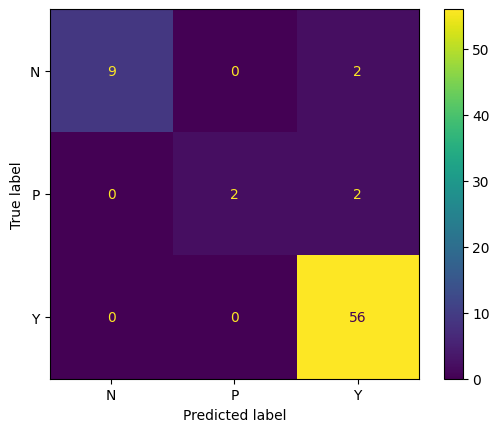

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 9.

- For P (PP): 2.

- For Y (YY): 56.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 58.

- For P (NN + YY): 65.

- For Y (NN + PP): 11.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 0.

- For P (NP + YP): 0.

- For Y (NY + PY): 4.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 2.

- For P (PN + PY): 2.

- For Y (YN + YP): 0.

#####Building decision tree model

This tree starts with BMI as the primary split, followed by HbA1c, Cholesterol, and TG at subsequent levels to refine classification. Each split reduces impurity, and the process continues until the leaf nodes, which classify samples as Non-Diabetic, Diabetic, or Predict-Diabetic based on their paths.

The last step is visualizing the decision tree. The resulting plot illustrates the structure of the decision tree, with node colors representing the class distributions at each split.

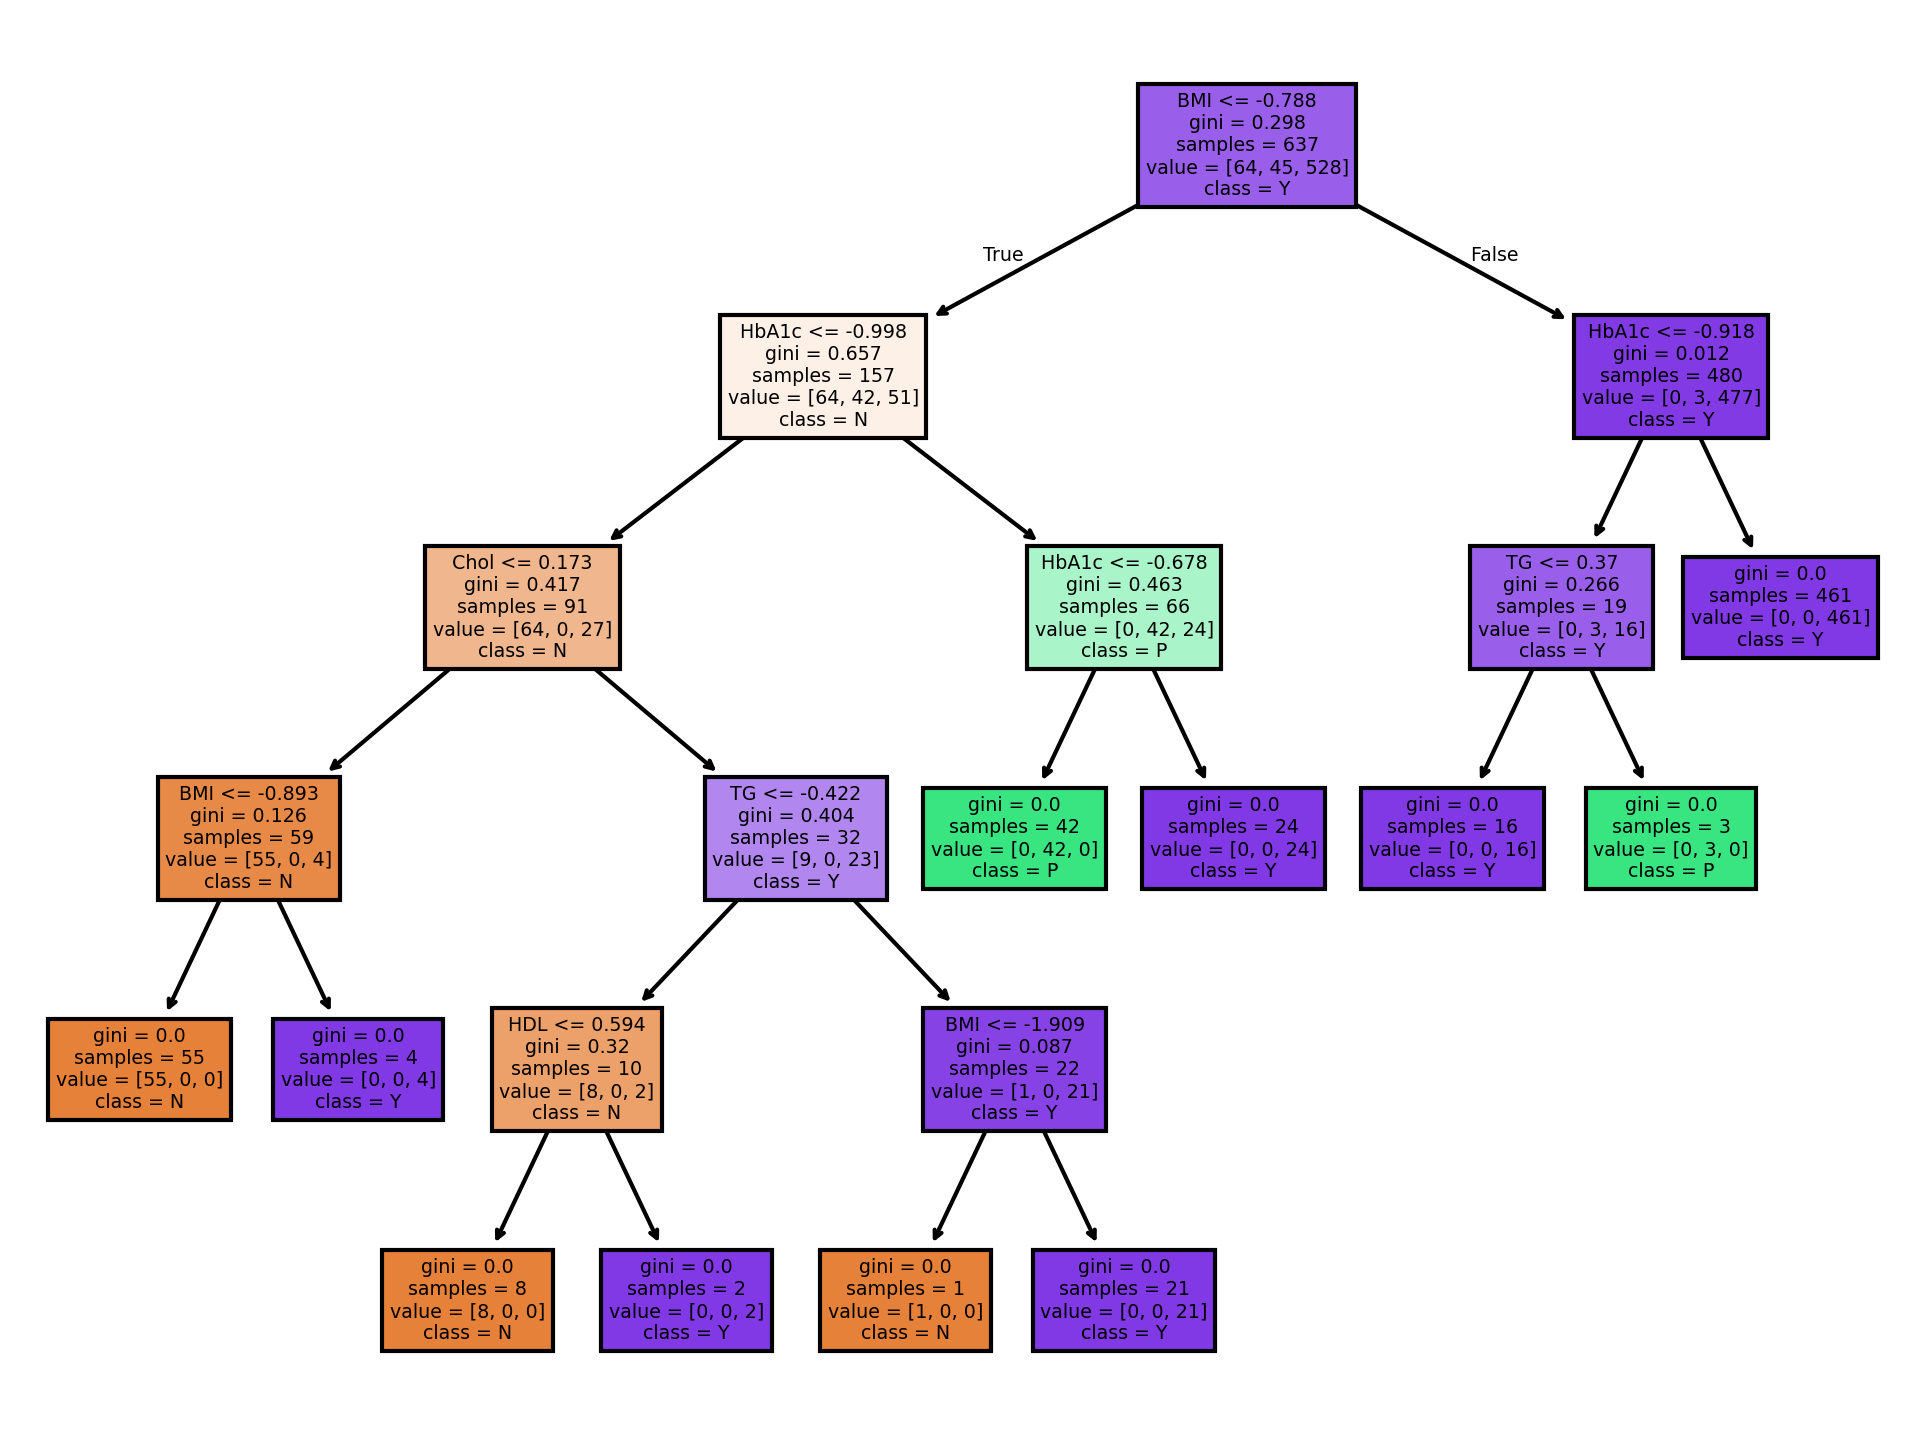

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

# Save the figure
fig.savefig('decision_tree_visualization1.png')
plt.show()

####Data spliting: %80 Training, %20 test

x_train: Feature set for training, comprising 80% of the dataset.

x_test: Feature set for testing, comprising 20% of the dataset.

y_train: Target set for training, corresponding to 80% of the dataset.

y_test: Target set for testing, corresponding to 20% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#####Build the decision tree model

In [ ]:
clf= DecisionTreeClassifier() #Gini is the selection measure by The default
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9436619718309859


#####Confusion matrix

[[ 16   0   5]
 [  0  11   3]
 [  0   0 107]]


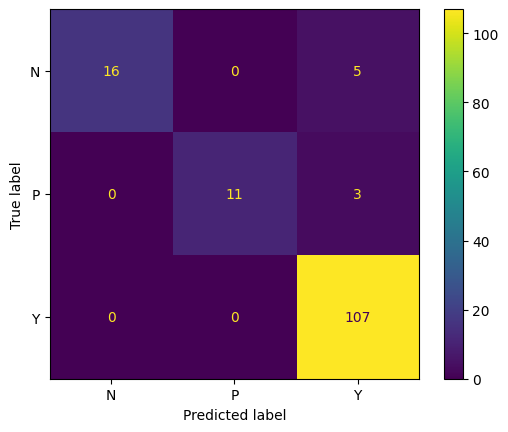

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 16.

- For P (PP): 10.

- For Y (YY): 107.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 117.

- For P (NN + YY): 123.

- For Y (NN + PP): 26.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 0.

- For P (NP + YP): 0.

- For Y (NY + PY): 9.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 5.

- For P (PN + PY): 4.

- For Y (YN + YP): 0.

#####Building decision tree model

This tree begins with BMI as the primary splitting criterion, followed by HbA1c, TG, and Urea to refine the classifications. Further splits involve Cholesterol and other features to reduce impurity. The process concludes at leaf nodes, classifying samples as Non-Diabetic, Diabetic, or Predict-Diabetic based on their paths through the tree.

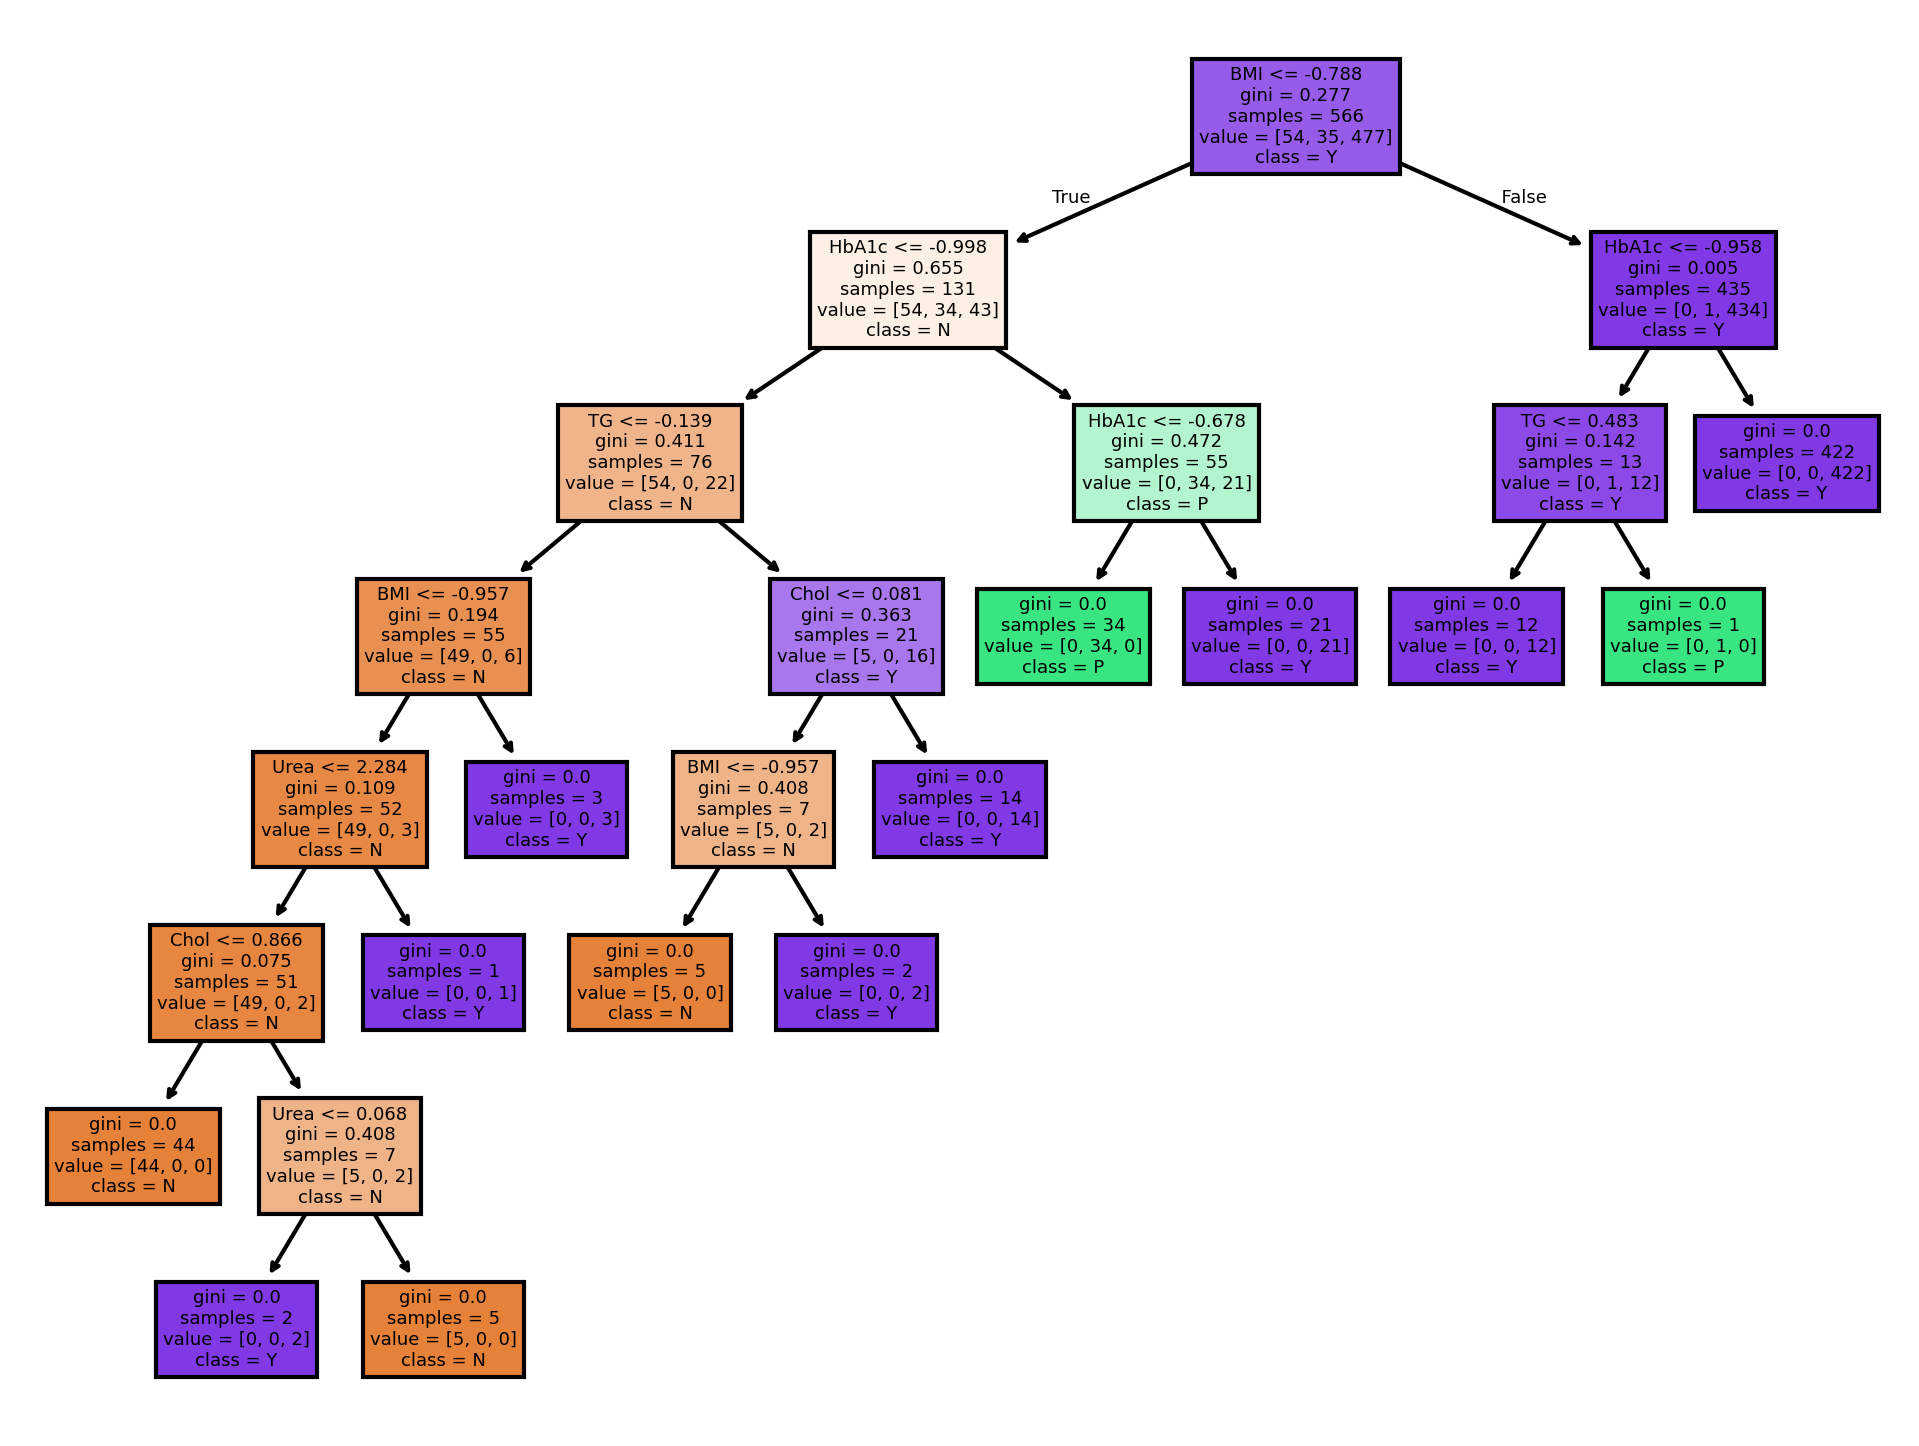

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

# Save the figure
fig.savefig('decision_tree_visualization2.png')
plt.show()

####Data spliting: %70 Training, %30 test

x_train: Feature set for training, comprising 70% of the dataset.

x_test: Feature set for testing, comprising 30% of the dataset.

y_train: Target set for training, corresponding to 70% of the dataset.

y_test: Target set for testing, corresponding to 30% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#####Building decision tree model

In [ ]:
clf= DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9530516431924883


#####Confusion matrix

[[ 23   0   5]
 [  0  15   5]
 [  0   0 165]]


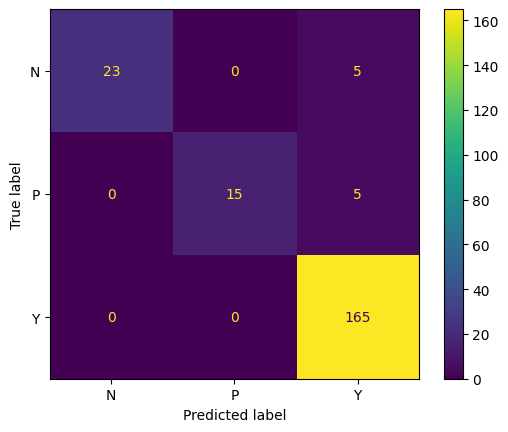

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 23.

- For P (PP): 15.

- For Y (YY): 165.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 180.

- For P (NN + YY): 188.

- For Y (NN + PP): 38.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 0.

- For P (NP + YP): 0.

- For Y (NY + PY): 10.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 5.

- For P (PN + PY): 5.

- For Y (YN + YP): 0.

#####Building decision tree model

his tree starts with BMI as the primary splitting feature, dividing samples into two main branches. The left branch evaluates HbA1c, followed by Cholesterol and BMI, to refine the classification. Subsequent splits involve HDL and TG to further segregate samples.

On the right branch, HbA1c is again used for splitting, followed by TG and BMI at deeper levels. Each split reduces impurity, and the tree ends at leaf nodes where samples are classified as Non-Diabetic, Diabetic, or Predict-Diabetic based on their paths.

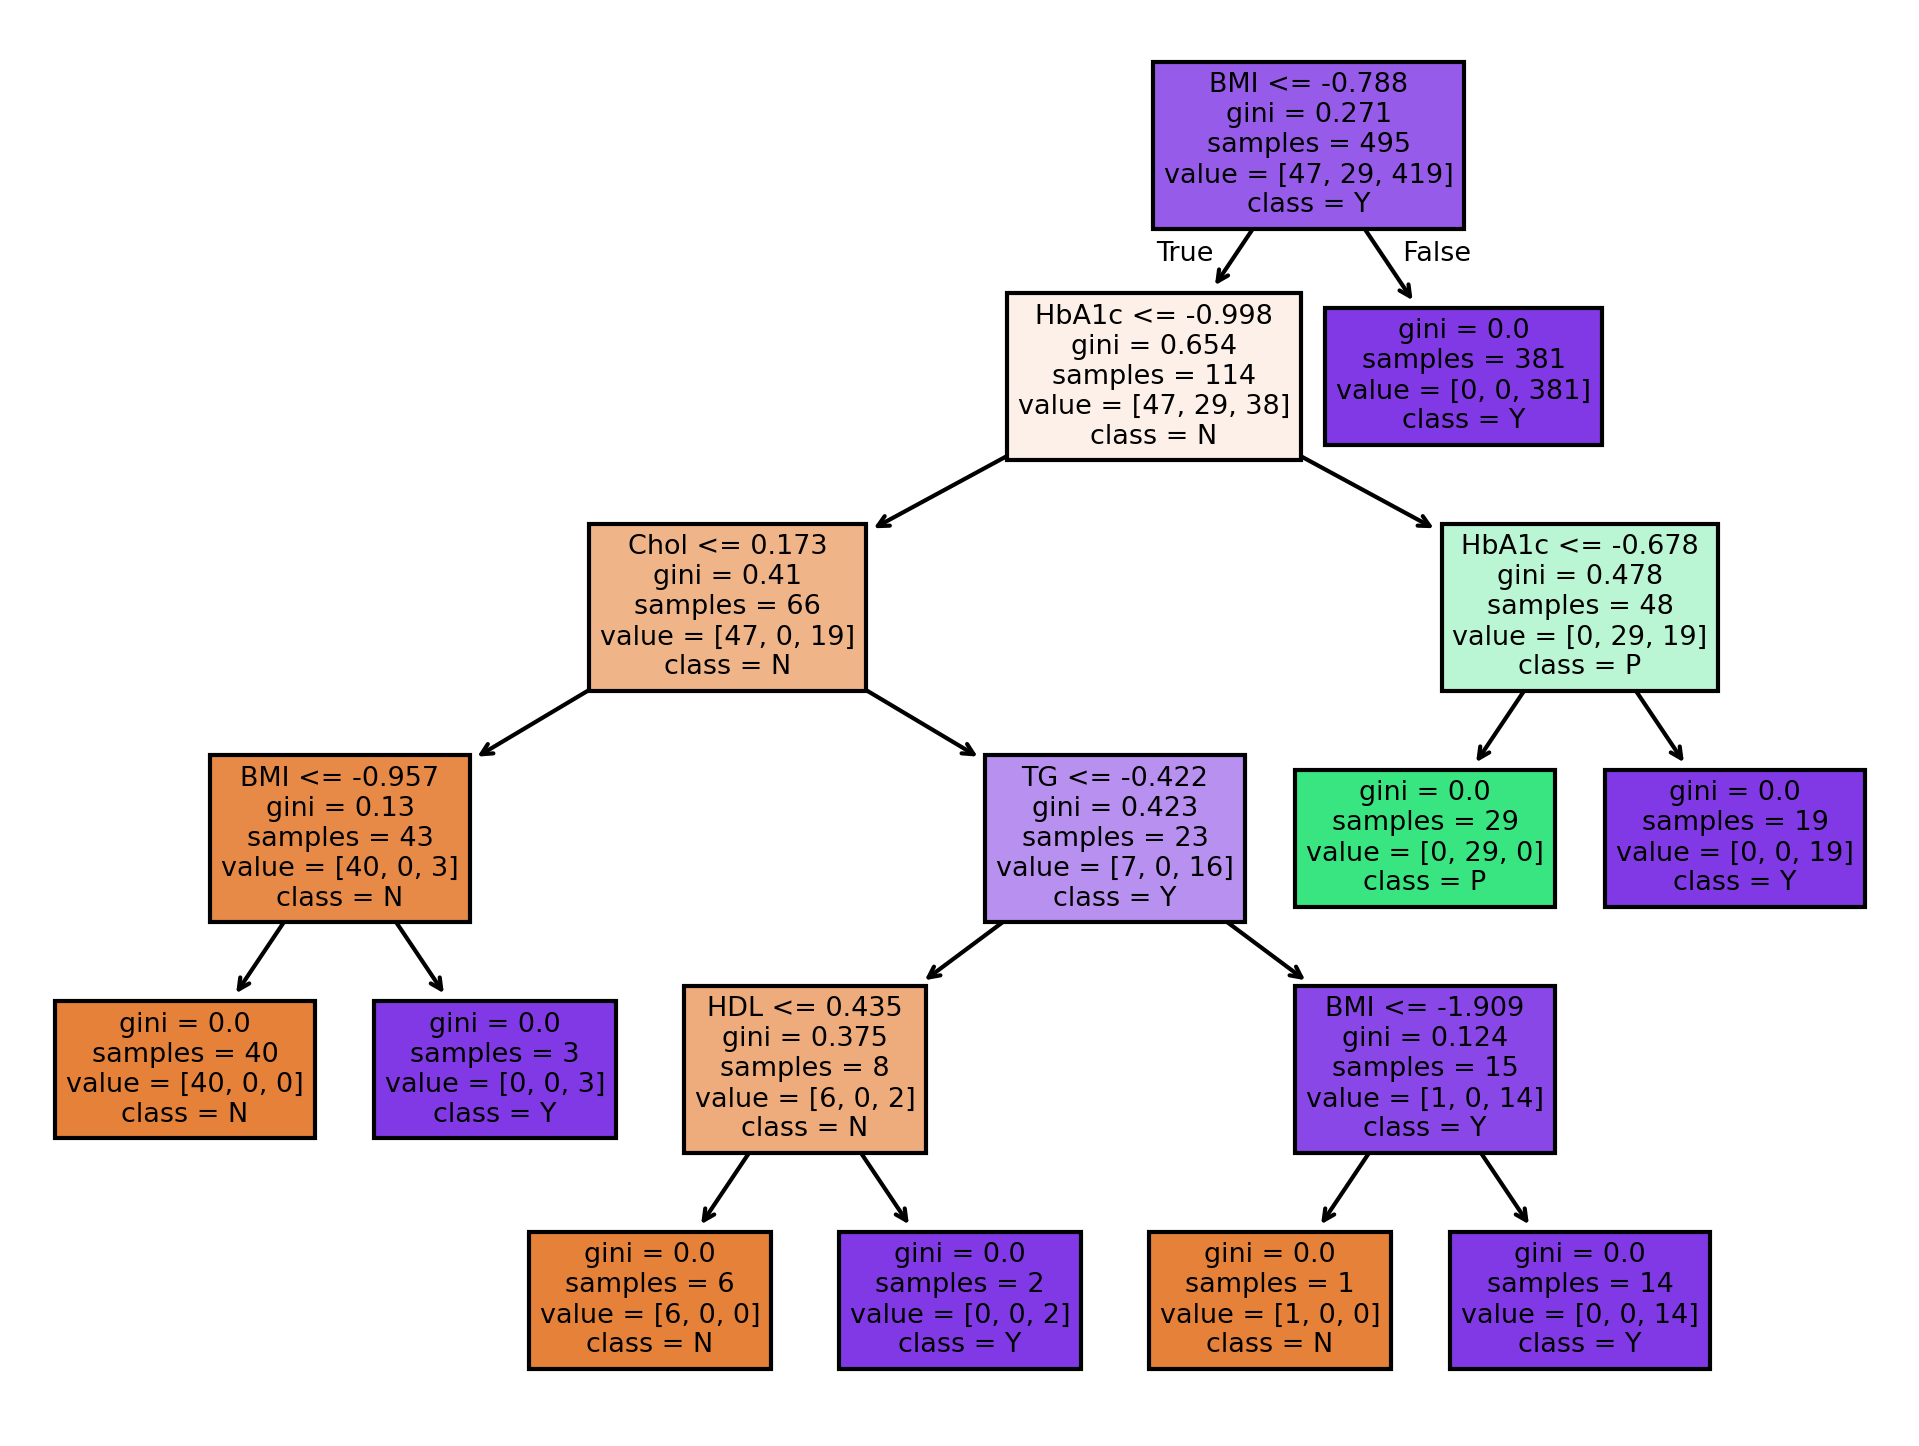

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

# Save the figure
fig.savefig('decision_tree_visualization3.png')
plt.show()

####Evaluate the models of Gini index

In [ ]:
from IPython.display import display, HTML

# Data for the table
data = {
    "": ["Accuracy"],
    "70% Training, 30% Testing": [0.9530516431924883],
    "80% Training, 20% Testing": [0.9295774647887324],
    "90% Training, 10% Testing": [0.9436619718309859],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Generate HTML code for the table
html_table = df.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

,"70% Training, 30% Testing","80% Training, 20% Testing","90% Training, 10% Testing"
Accuracy,0.953052,0.929577,0.943662


Among these partitioning strategies, the model trained on the 70% training set and 30% testing achieved the highest accuracy (0.953 or 95.3%), followed by the model trained on the 90% training set and 10% testing set (0.944 or 94.4%), and finally the model trained on the 80% training set and 20% testing set with an accuracy of (0.930 or 93%).

A larger test size reduces the training data, potentially lowering model performance. Conversely, a smaller test size might lead to overfitting, where the model performs well on the test set but poorly on new data. Balancing the training and test sets is crucial for ensuring good generalization. In this case, a 30% test size offers the best balance, resulting in the highest accuracy.

It's important to note that accuracy could be misleading if the dataset were unbalanced, but since the data has already been balanced, the accuracy reflects the model's true performance across all classes.

###IG (entropy)

  IG(entropy) select the attributes that reduce uncertainty the most leading to the most homogeneous branches.

####Data spliting: %90 Training, %10 test

x_train: Feature set for training, comprising 90% of the dataset.

x_test: Feature set for testing, comprising 10% of the dataset.

y_train: Target set for training, corresponding to 90% of the dataset.

y_test: Target set for testing, corresponding to 10% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

#####Build the decision tree model

In [ ]:
clf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9436619718309859


#####Confusion matrix

[[ 9  0  2]
 [ 0  2  2]
 [ 0  0 56]]


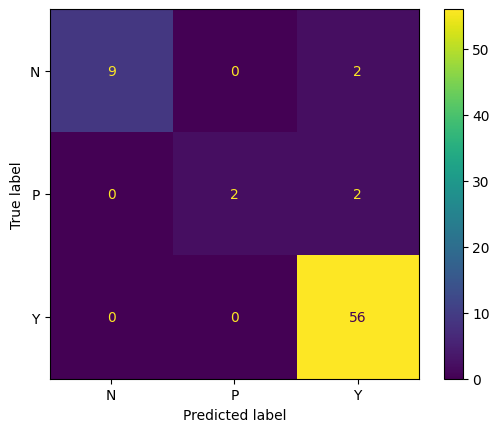

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 9.

- For P (PP): 2.

- For Y (YY): 56.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 58.

- For P (NN + YY): 65.

- For Y (NN + PP): 11.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 0.

- For P (NP + YP): 0.

- For Y (NY + PY): 4.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 2.

- For P (PN + PY): 2.

- For Y (YN + YP): 0.

#####Building decision tree model

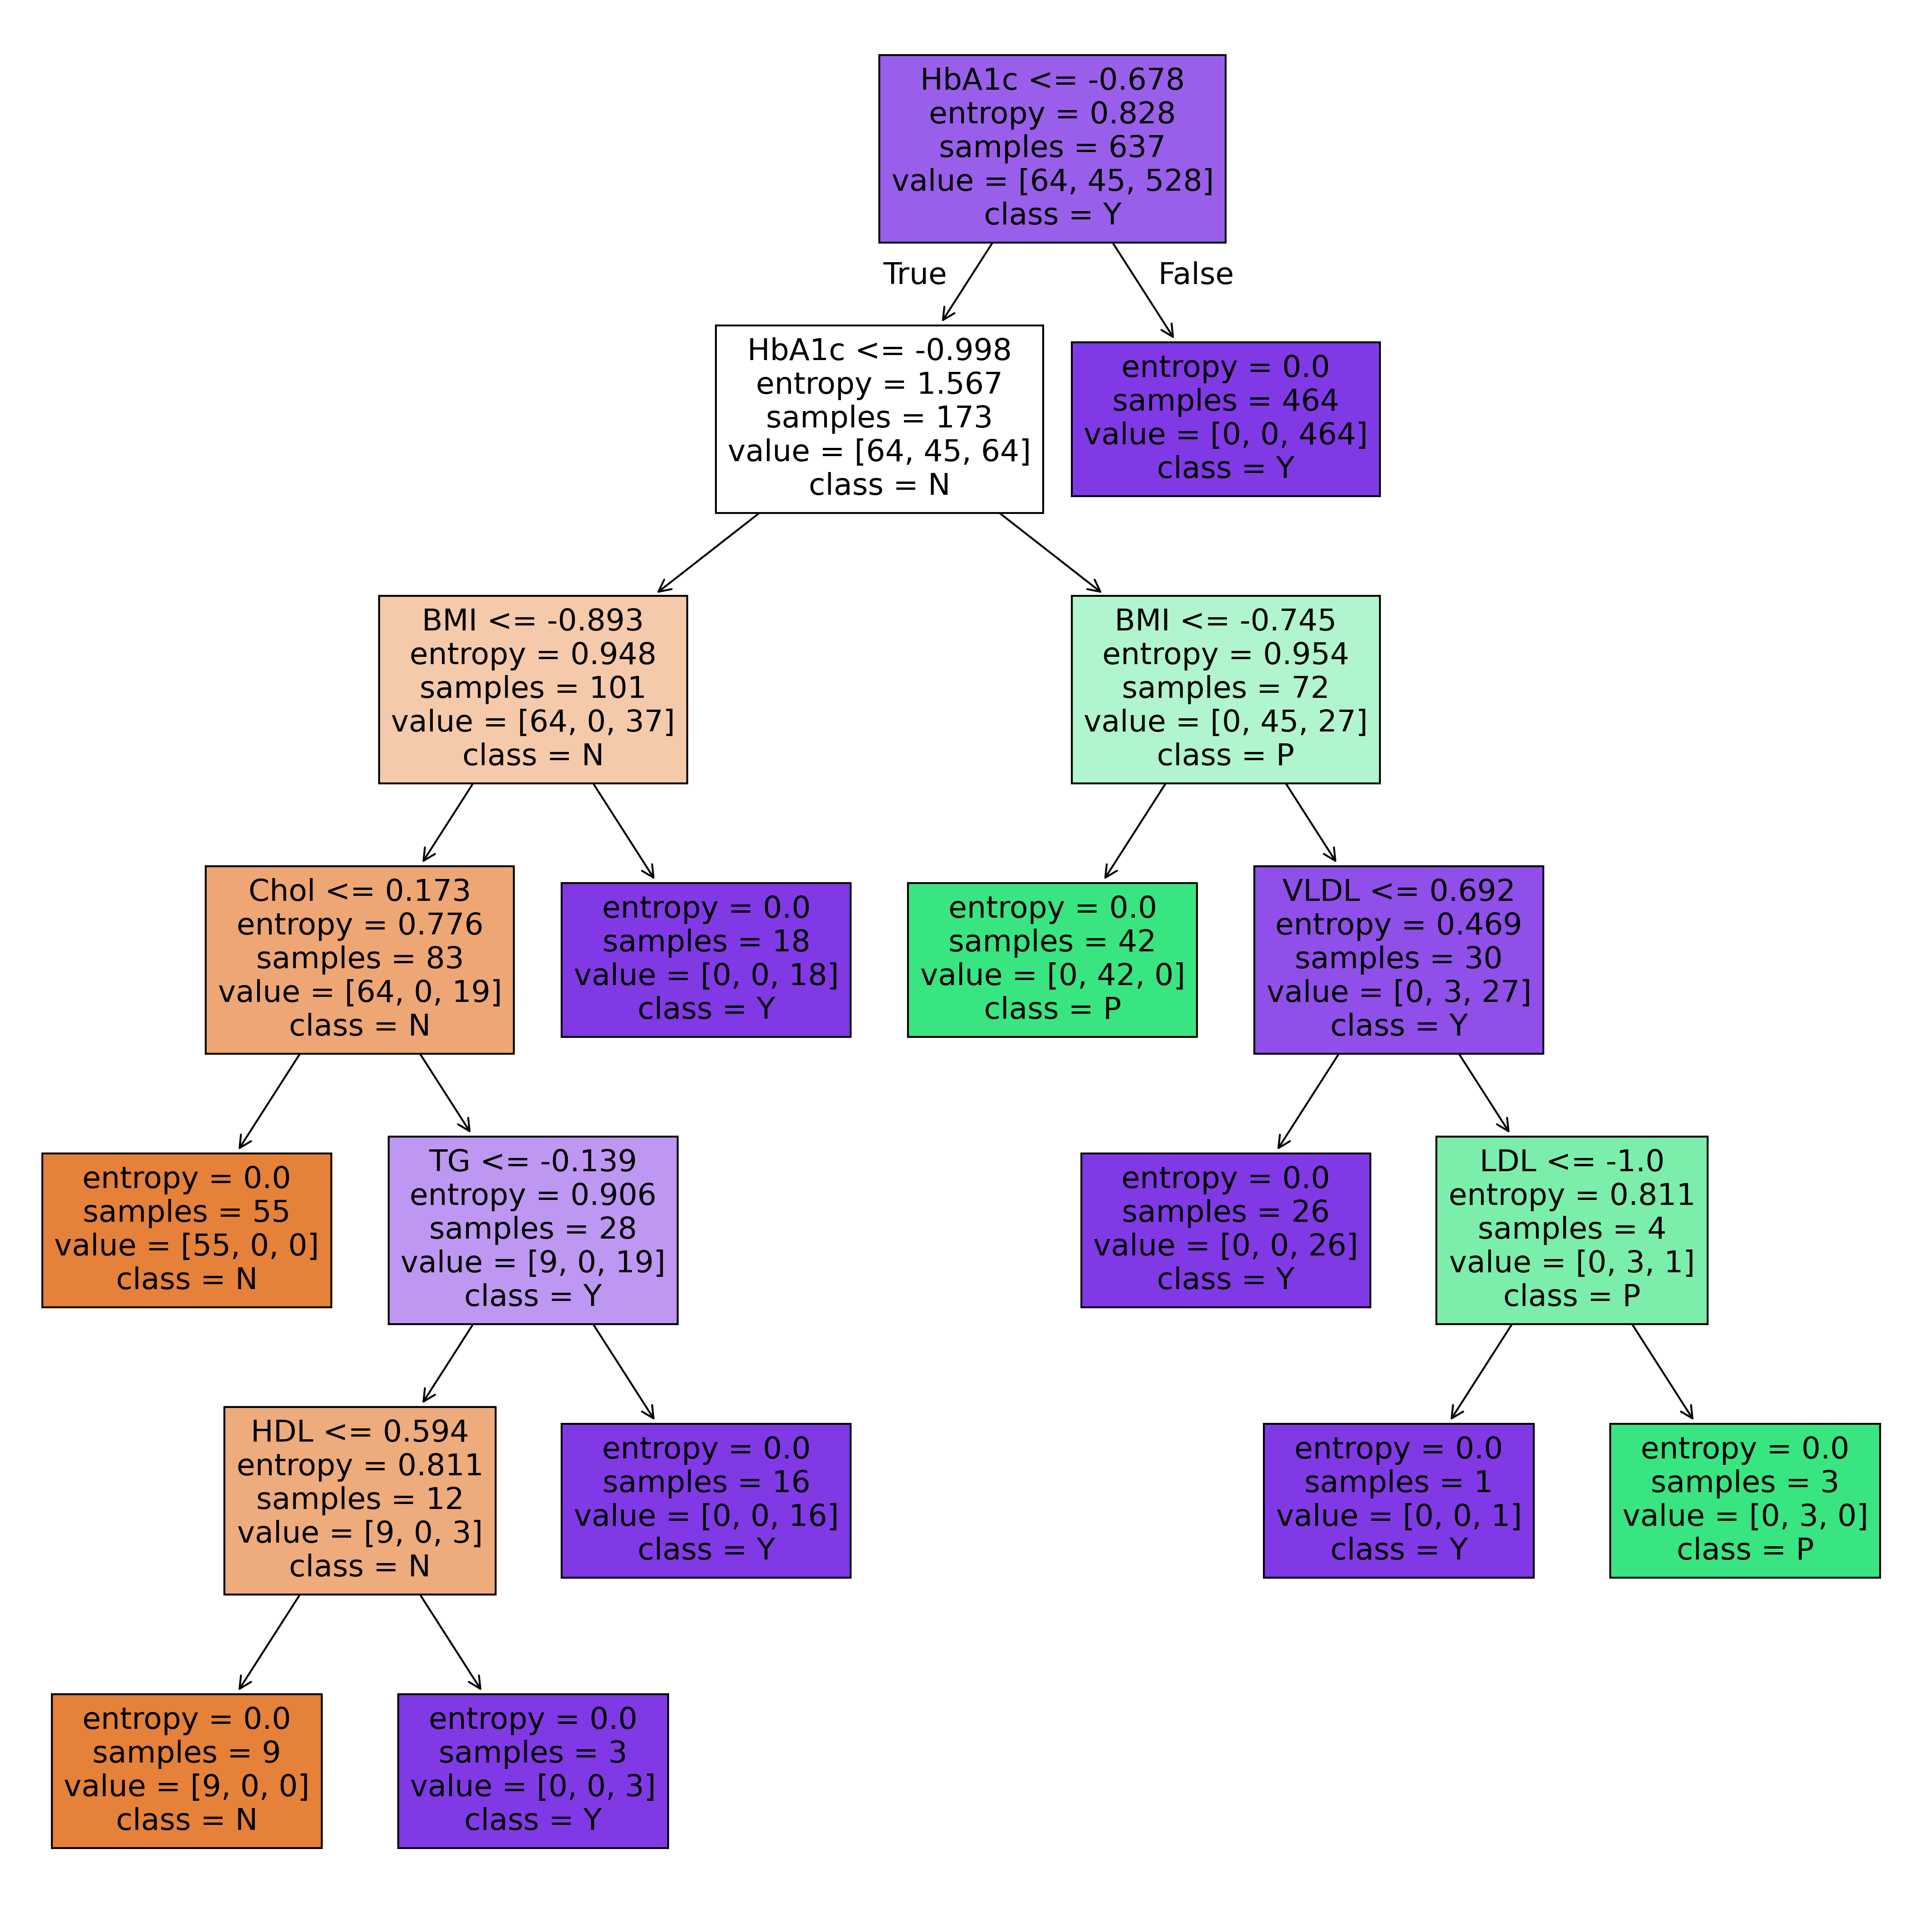

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(18,18),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

fig.savefig('decision_tree_visualization4.png')

**Root Split:**
The tree starts by splitting on HbA1c (glycated hemoglobin) with a threshold of ≤ -0.678.

If the value is greater, samples are classified directly as Y.
Otherwise, the tree continues splitting further.

**Next Splits:**
For samples with HbA1c ≤ -0.998, the tree looks at BMI (Body Mass Index).
After BMI, it checks features like Chol (Cholesterol), TG (Triglycerides), and HDL (High-Density Lipoprotein).

**Final Classifications:**
At the leaf nodes, samples are classified into categories like N, Y, or P based on the splits they followed.

####Data spliting: %80 Training, %20 test

x_train: Feature set for training, comprising 80% of the dataset.

x_test: Feature set for testing, comprising 20% of the dataset.

y_train: Target set for training, corresponding to 80% of the dataset.

y_test: Target set for testing, corresponding to 20% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#####Build the decision tree model

In [ ]:
clf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9295774647887324


#####Confusion matrix

[[ 9  0  2]
 [ 0  2  2]
 [ 0  0 56]]


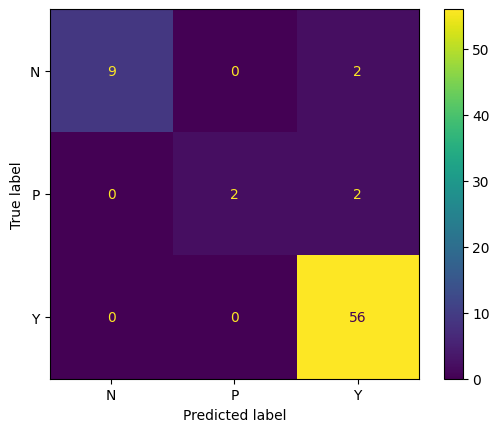

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 15.

- For P (PP): 11.

- For Y (YY): 106.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 117.

- For P (NN + YY): 121.

- For Y (NN + PP): 26.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 1.

- For P (NP + YP): 0.

- For Y (NY + PY): 9.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 6.

- For P (PN + PY): 3.

- For Y (YN + YP): 1.

#####Building decision tree model

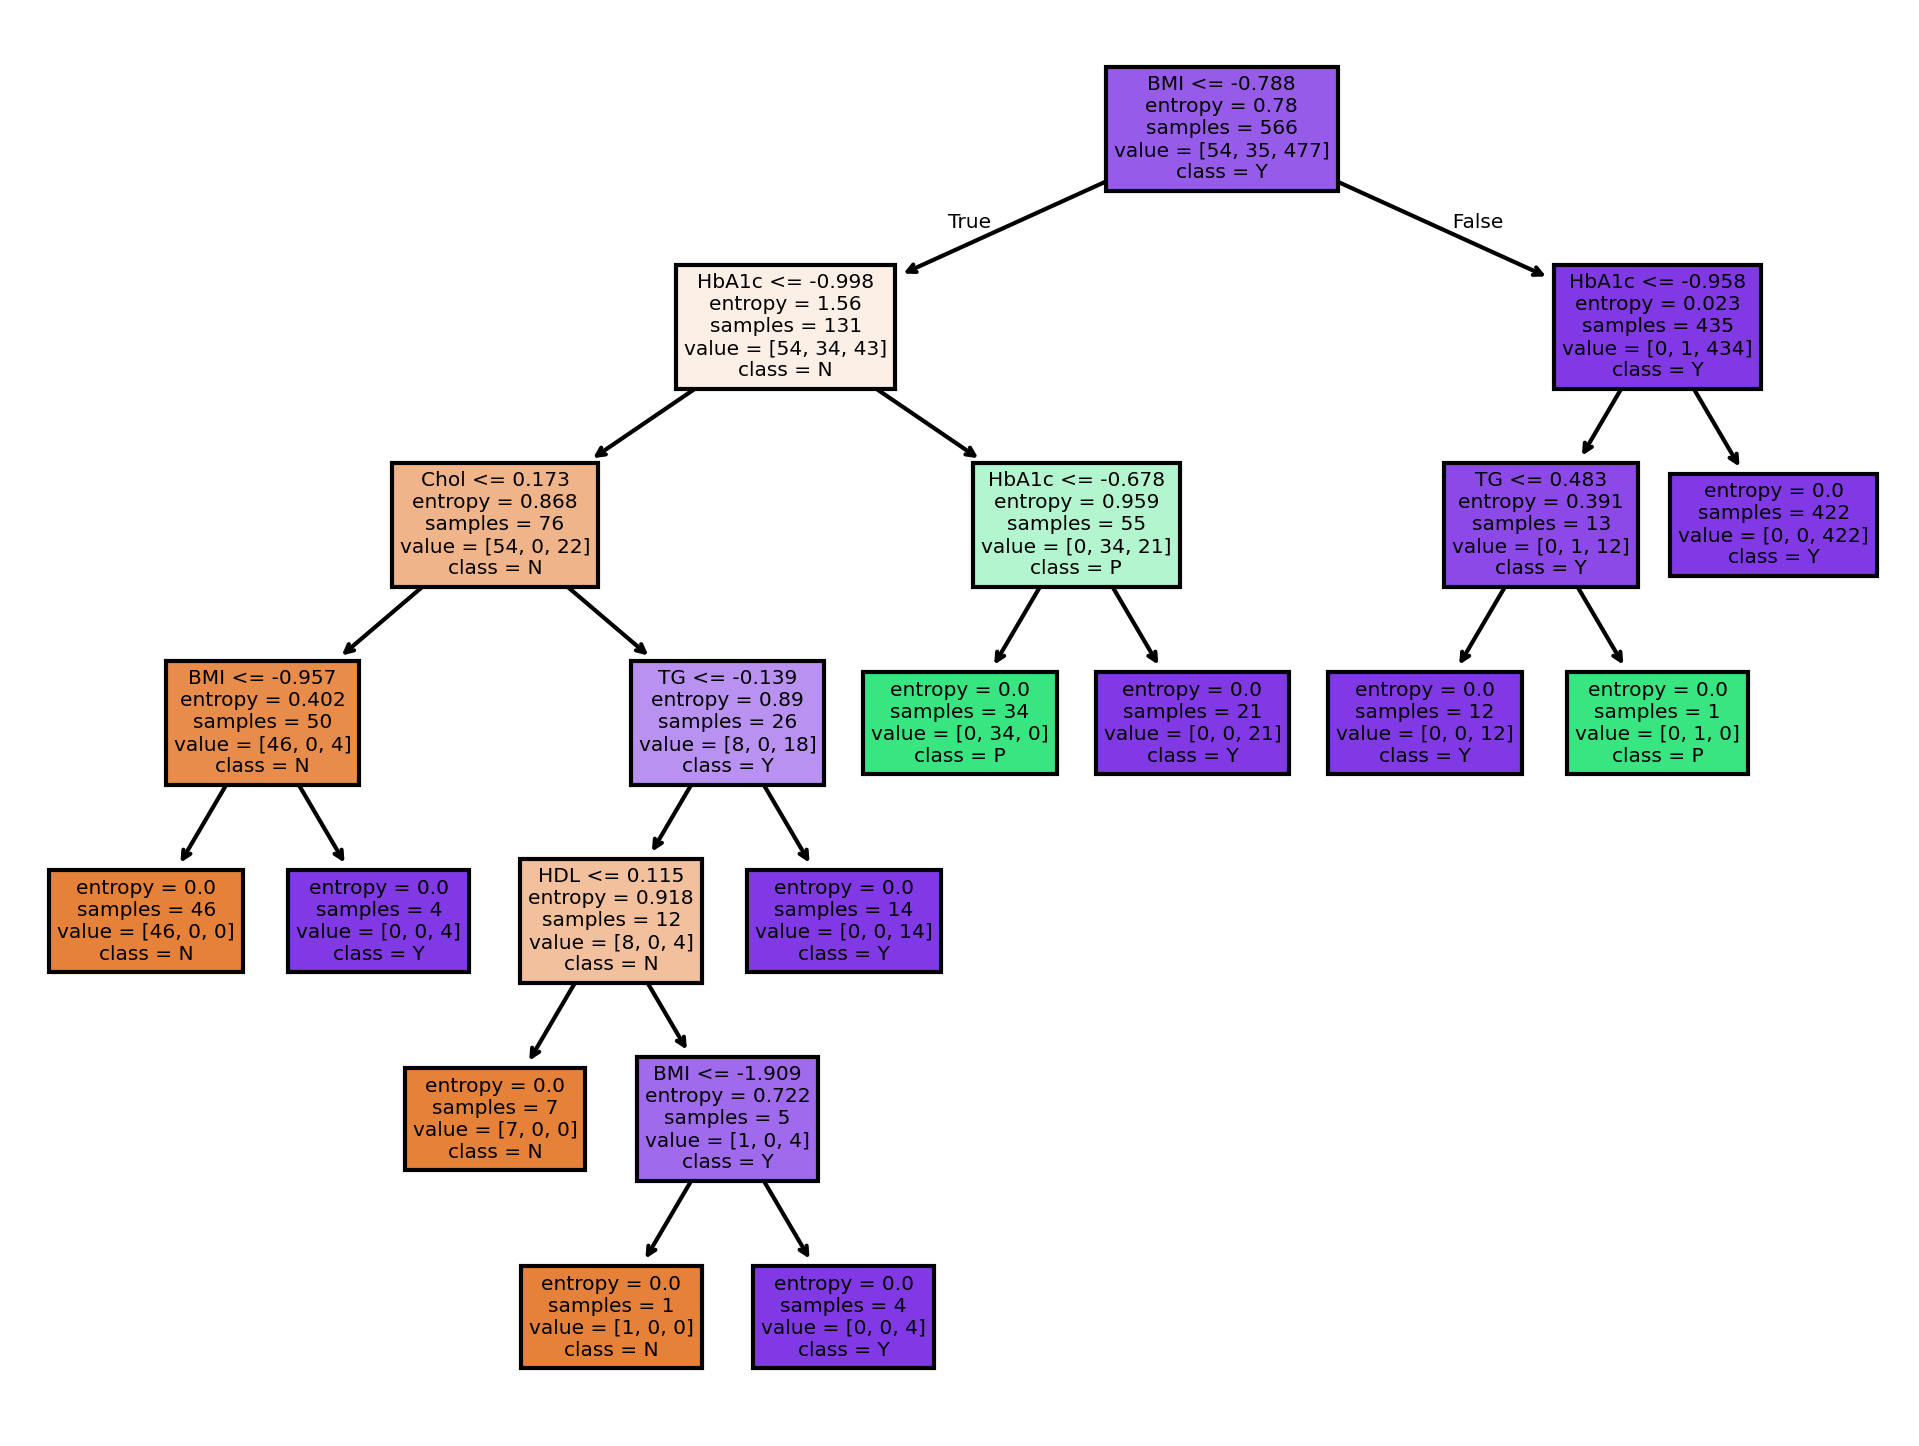

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

fig.savefig('decision_tree_visualization5.png')

**Root Split:**
This tree also starts by splitting on HbA1c but uses a stricter threshold (≤ -0.998).

If HbA1c > -0.998, the tree immediately checks BMI.
Otherwise, it continues splitting using other features.

**Next Splits:**
For lower HbA1c values, the tree examines Chol first, then other features like TG and HDL.

**Final Classifications:**
Like Tree 1, this tree ends with leaf nodes that classify samples into N, Y, or P based on their path through the splits.




####Data spliting: %70 Training, %30 test

x_train: Feature set for training, comprising 70% of the dataset.

x_test: Feature set for testing, comprising 30% of the dataset.

y_train: Target set for training, corresponding to 70% of the dataset.

y_test: Target set for testing, corresponding to 30% of the dataset.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#####Build the decision tree model

In [ ]:
clf= DecisionTreeClassifier() #Gini is the selection measure by The default
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

#####Accuracy

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9530516431924883


#####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df['CLASS'].unique()

disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test, display_labels=cn)

[[ 23   0   5]
 [  0  15   5]
 [  0   0 165]]


KeyError: 'CLASS'

True Positives (TP) means the instances that were identified correctly by the model as belonging to the predicted class:

- For N (NN): 23.

- For P (PP): 15.

- For Y (YY): 165.

True Negatives (TN) means the instances that were correctly identified by the model as not belonging to the predicted class:

- For N (PP + YY): 180.

- For P (NN + YY): 188.

- For Y (NN + PP): 38.

False Positives (FP) means the instances that were incorrectly identified by the model as belonging to the predicted class:

- For N (PN + YN): 0.

- For P (NP + YP): 0.

- For Y (NY + PY): 10.

False Negatives (FN) means the instances that were incorrectly identified by the model as not belonging to the predicted class:

- For N (NP + NY): 5.

- For P (PN + PY): 5.

- For Y (YN + YP): 0.

#####Building decision tree model

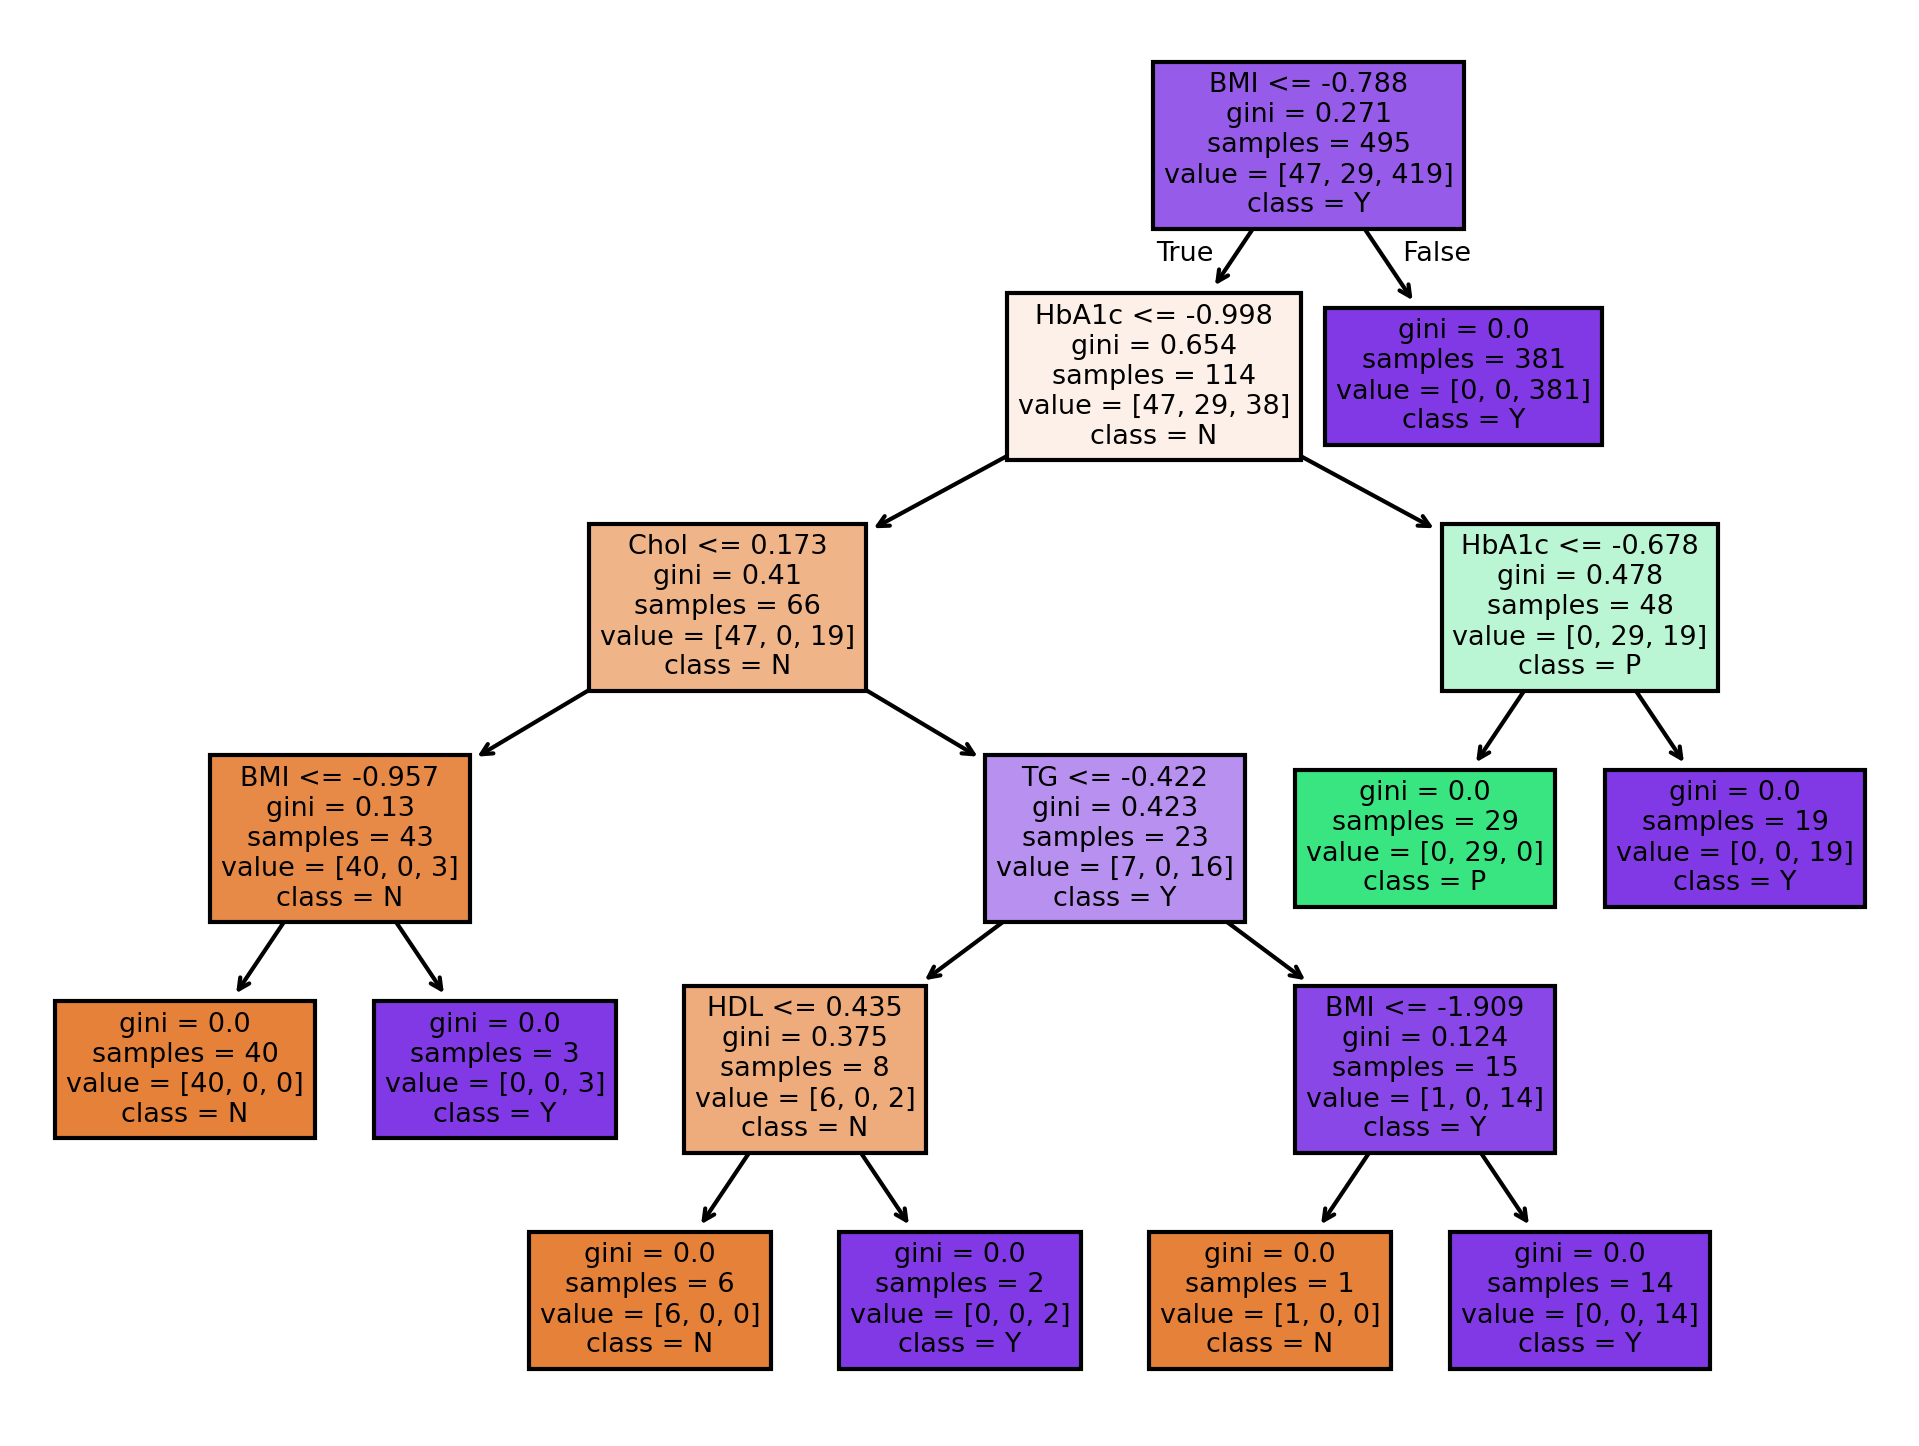

In [ ]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);

fig.savefig('decision_tree_visualization6.png')

**Root Split:**
The tree starts by checking BMI ≤ -0.788.
 • If yes, it continues to check other features like HbA1c, Cholesterol, and others.
 • If no, it directly classifies the sample as Y.

  **Next Steps **(For BMI ≤ -0.788):
 • The next split is on HbA1c ≤ -0.998.
 • If HbA1c is low: The tree checks Cholesterol first, then BMI, TG, and HDL to decide between N or Y.
 • If HbA1c is high: It checks TG ≤ -0.422 to classify as either N or Y.
  Simplification for High BMI:
If BMI is greater than -0.788, the tree doesn’t check anything else and assigns the class as Y.

####Evaluate the models of IG(entropy)

In [ ]:
from IPython.display import display, HTML

# Data for the table
data = {
    "": ["Accuracy"],
    "70% Training, 30% Testing": [0.9530516431924883],
    "80% Training, 20% Testing": [0.9225352112676056],
    "90% Training, 10% Testing": [0.9436619718309859],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Generate HTML code for the table
html_table = df.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

,"70% Training, 30% Testing","80% Training, 20% Testing","90% Training, 10% Testing"
Accuracy,0.953052,0.922535,0.943662


Among these partitioning strategies, the model trained on the 70% training set and 30% testing achieved the highest accuracy (0.953 or 95.3%), followed by the model trained on the 90% training set and 10% testing set (0.944 or 94.4%), and finally the model trained on the 80% training set and 20% testing set with an accuracy of (0.923 or 92.3%).

A larger test size reduces the training data, potentially lowering model performance. Conversely, a smaller test size might lead to overfitting, where the model performs well on the test set but poorly on new data. Balancing the training and test sets is crucial for ensuring good generalization. In this case, a 30% test size offers the best balance, resulting in the highest accuracy.

###The best model between Gini index and IG(entropy)

After evaluating each measure and picking the data splitting that construct the best model for each meature, which was 70% training 30% testing for both Gini index and IG(entropy). Now we compare between these two models accuracy.

In [ ]:
## from IPython.display import display, HTML

# Data for the table
data = {
    "": ["Accuracy"],
    "IG(entropy)": [0.9530516431924883],
    "Gini index": [0.9530516431924883],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Generate HTML code for the table
html_table = df.to_html(index=False)

# Display the HTML table
display(HTML(html_table))

,IG(entropy),Gini index
Accuracy,0.953052,0.953052


**Accuracy and Error Rate:** Both the Gini index and Index IG(entropy) models provide identical accuracy (95.3% or 0.953), indicating that both models classification performance is equally well.

therefore, the error rates for both models are also the same, with an error rate of 4.7% (0.047). A lower error rate indicates fewer misclassifications.

Given that both models yield the same performance metrics, it can be concluded that there is no significant difference in overall performance between the Gini Index and IG(entropy) models in this case. Thus, either model can be considered reliable for the task, offering similar high accuracy.

##Clustering

### K-means clustering

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.

Firstly we are going to remove the class labels and any columns that could interfere with the clustering process because clustring is an unsopervised learning method which dosen't  have a predifend class.

In [ ]:
# Remove the class labels.
# Extract the features (excluding the target variable, if any).
df = pd.read_csv("Dataset/Processed_dataset.csv")
#drop the class feature which is in coulmn1, the id feature in coulmn2 and No_pation feature in coulms 12
features = df.drop(df.columns[[0,1,11]], axis=1)

Since the K-means algorithm is sensitive to feature scales, we begin by scaling the feature to have the same unnite.

In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# Scale the variable if needed.
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
        BMI     HbA1c        TG      VLDL      Chol      Urea       LDL  \
0 -1.274206 -1.296987 -0.704914 -0.847649 -0.981598  0.031916 -0.518220   
1 -1.697288 -1.296987 -1.157491 -1.321316  0.127251  1.920990 -0.619716   
2 -1.697288 -1.656221 -1.157491 -1.321316 -1.720831 -1.566532 -1.127198   
3 -1.062665 -1.656221 -0.818059 -0.847649 -1.074002 -1.784502 -0.518220   
4 -1.062665 -1.656221 -1.383780 -1.321316 -1.720831  0.177229 -1.025702   

         Cr       HDL  
0  0.211193 -0.044327  
1 -0.725166 -1.002115  
2 -2.012660 -0.363590  
3 -0.491076 -0.682852  
4 -0.666644 -0.682852  


We apply clustering using three different sizes of K, which are 2,4,6.

The selection was based on different numbers of stages in the low, medium, and high ranges. We select to start with lower size 2 because it is the number that is repeated in the stages of diabetes in the research, and in this way we hope to cover the best possible results and clustering results.

K=2 because it is the most common and general number for clustering in the field of diabetes, according to the number of diabetes stages by SDCPG systems.

The result of follwing code shows the cordinates of each cluster when K=2 ,4 and 6 follwing up with the assign cluster to each data point.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
#5) Build the K-means model
# Set a seed for random number generation
np.random.seed(42)

# Define different values of K
k_values = [2, 4, 6]  # Example: using 2, 4, and 6 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(df_scaled)

    # Print the clustering result for the current value of K
    print(f"Cluster Centers (K={k}):")
    print(kmeans_result.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_result.labels_)
    print("\n")

Cluster Centers (K=2):
[[-0.25985886 -0.37270392 -0.56902896 -0.59259782 -0.3622841   0.14820237
  -0.10442642  0.11230056  0.02657623]
 [ 0.34335449  0.49245796  0.75186449  0.7830063   0.47869014 -0.1958215
   0.13797982 -0.14838402 -0.03511548]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 


### Evaluation of clustering

We implemented two evaluation techniques: the Silhouette Coefficient, which helps us understand how well each data point fits within its cluster, and the Elbow Method, which identifies the optimal number of clusters by analyzing the total within-cluster sum of squares(WSS). These methods provided valuable insights into the effectiveness of our clustering results from the previous cell.

#### 1-Silhouette coefficient

The first evaluation method we used is the Silhouette Coefficient, as it measures how similar an object is to its own cluster compared to other clusters. Illustrated by a dotted line, it is a critical metric for assessing clustering quality, with a higher value indicating a more appropriate choice of the number of clusters, K.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


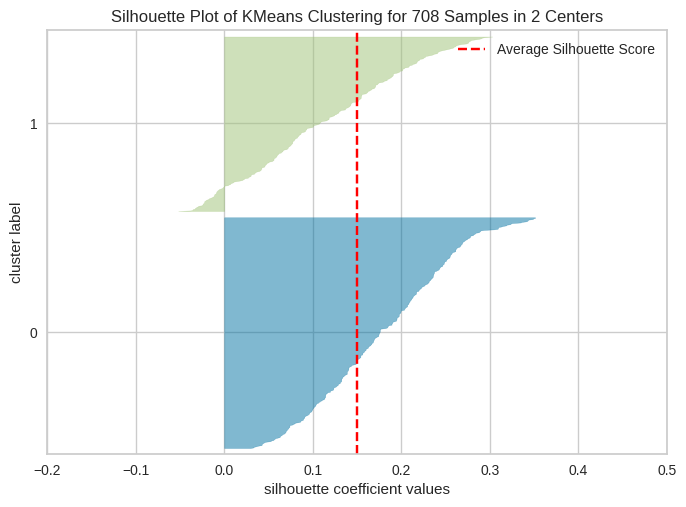

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


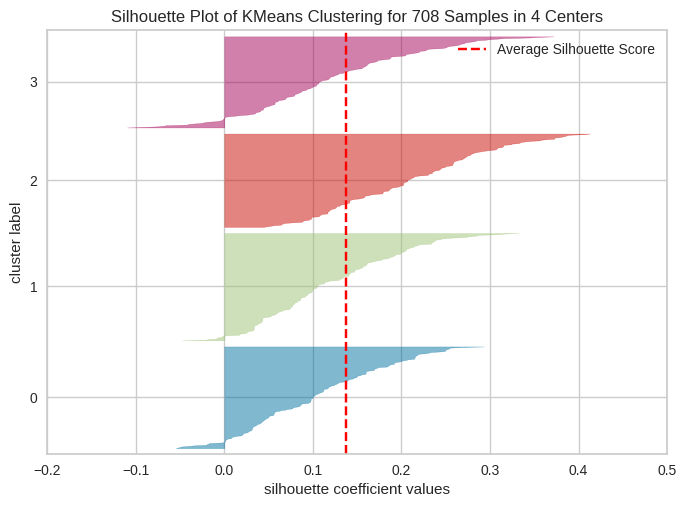

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


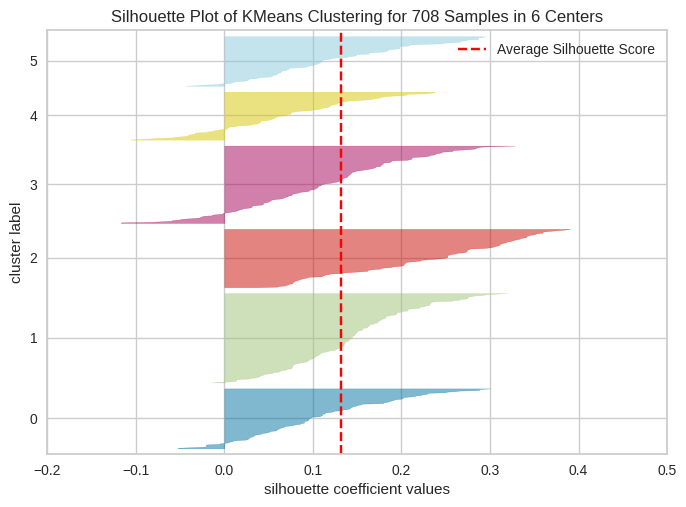

In [ ]:
# Visual the model using (SilhouetteVisualizer)
%pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# Define different values of K
k_values = [2, 4, 6]  # Example: using 2, 4, and 6 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(df_scaled)

    # Visualize the clustering model with SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

After analyzing the graphs, we computed the Silhouette Coefficient for each value of K to evaluate the quality of the clusters:

* When K=2 silhouette coefficient value = 0.1498

*  When K=4 silhouette coefficient value = 0.1369
*   When K=6 silhouette coefficient value =0.1318


This means that the best number of clusters is K = 2, as it corresponds to the highest silhouette coefficient value.

####2-Elbow method

The second evaluation method used is the Elbow Method, where the optimal number of clusters is identified at the "elbow" point on the curve, where the rate of variance reduction slows down, indicating the ideal K value.

WCSS for k=1: 6371.999999999999
WCSS for k=2: 5381.469886017787
WCSS for k=3: 4859.5892817679305
WCSS for k=4: 4389.745915934125
WCSS for k=5: 4138.832832951984
WCSS for k=6: 3934.158542458039
WCSS for k=7: 3743.3496721295887
WCSS for k=8: 3534.8784312230473
WCSS for k=9: 3370.6670243060735
WCSS for k=10: 3209.822939790599


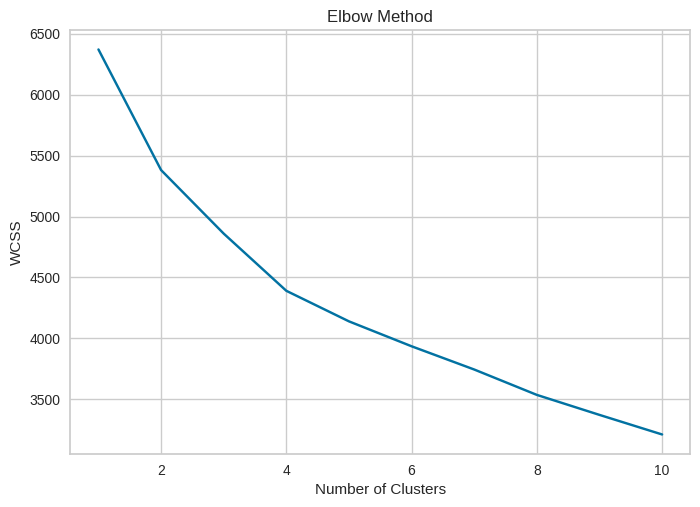

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Calculate the total within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

    # Print the WCSS value for the current value of k
    print(f"WCSS for k={i}: {kmeans.inertia_}")

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


After visually displaying the graph of the total within-cluster sum of squares (WSS) with respect to K, we observe that the turning point occurs at K = 2, where the rate of decrease in WSS begins to slow down. This indicates that the optimal number of clusters is 2.